# Polynomial descent


# Implementation of Polynomial Regression

The basic goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable x. In simple regression, we used following equation –

y = a + bx + e

Here y is dependent variable, a is y intercept, b is the slope and e is the error rate.

In many cases, this linear model will not work out For example if we analyzing the production of chemical synthesis in terms of temperature at which the synthesis take place in such cases we use quadratic model

y = a + b1x + b2^2 + e

Here y is dependent variable on x, a is y intercept and e is the error rate.

In general, we can model it for nth value.

y = a + b1x + b2x^2 +....+ bnx^n

Step 1: Import libraries and dataset
Import the important libraries and the dataset we are using to perform Polynomial Regression.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
datas = pd.read_csv("data.csv")
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


Step 2: Dividing the dataset into 2 components

Divide dataset into two components that is X and y.X will contain the Column between 1 and 2. y will contain the 2 column.

In [3]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

Step 3: Fitting Linear Regression to the dataset

Fitting the linear Regression model On two components.

In [4]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

Step 4: Fitting Polynomial Regression to the dataset

Fitting the Polynomial Regression model on two components X and y.

In [5]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

Step 5: In this step we are Visualising the Linear Regression results using scatter plot.

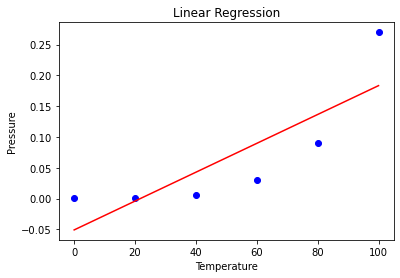

In [6]:
# Visualising the Linear Regression results
plt.scatter(X, y, color="blue")

plt.plot(X, lin.predict(X), color="red")
plt.title("Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")

plt.show()

Step 6: Visualising the Polynomial Regression results using scatter plot.

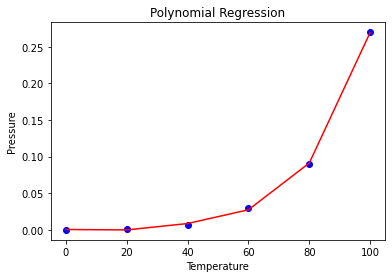

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color="blue")

plt.plot(X, lin2.predict(poly.fit_transform(X)), color="red")
plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")

plt.show()

Step 7: Predicting new result with both Linear and Polynomial Regression.

# Polynomial descent


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(seed=42)

In [23]:
def create_data():
    x = PolynomialFeatures(degree=5).fit_transform(
        np.linspace(-10, 10, 100).reshape(100, -1)
    )
    l = lambda x_i: (1 / 3) * x_i**3 - 2 * x_i**2 + 2 * x_i + 2
    data = l(x[:, 1])
    noise = np.random.normal(0, 0.1, size=np.shape(data))
    y = data + noise
    y = y.reshape(100, 1)
    return {"x": x, "y": y}

In [24]:
def plot_function(x, y):
    fig = plt.figure(figsize=(10, 10))
    plt.plot(
        x[:, 1],
        [(1 / 3) * x_i**3 - 2 * x_i**2 + 2 * x_i + 2 for x_i in x[:, 1]],
        c="lightgreen",
        linewidth=3,
        zorder=0,
    )
    plt.scatter(x[:, 1], y)
    plt.show()

In [25]:
def w_update(y, x, batch, w_old, eta):
    derivative = np.sum(
        [(y[i] - np.dot(w_old.T, x[i, :])) * x[i, :] for i in range(np.shape(x)[0])]
    )
    print(derivative)
    return w_old + eta * (1 / batch) * derivative

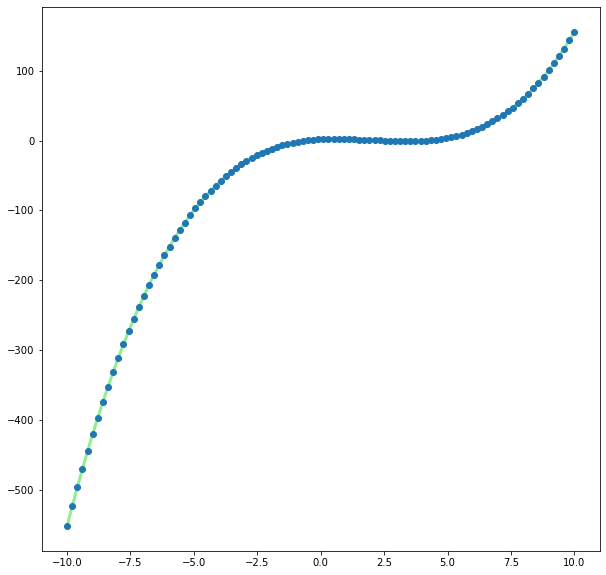

In [26]:
# initialize variables
w = np.random.normal(size=(6, 1))
data = create_data()
x = data["x"]
y = data["y"]
plot_function(x, y)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

np.random.seed(seed=42)


def create_data():
    x = PolynomialFeatures(degree=6).fit_transform(
        np.linspace(-2, 2, 100).reshape(100, -1)
    )
    x[:, 1:] = MinMaxScaler(feature_range=(-2, 2), copy=False).fit_transform(x[:, 1:])
    l = lambda x_i: np.cos(0.8 * np.pi * x_i)
    data = l(x[:, 1])
    noise = np.random.normal(0, 0.1, size=np.shape(data))
    y = data + noise
    y = y.reshape(100, 1)
    # Normalize Data
    return {"x": x, "y": y}


def plot_function(x, y, w, Error, w_s):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
    ax[0].plot(
        x[:, 1],
        [np.cos(0.8 * np.pi * x_i) for x_i in x[:, 1]],
        c="lightgreen",
        linewidth=3,
        zorder=0,
    )
    ax[0].scatter(x[:, 1], y)
    ax[0].plot(x[:, 1], np.dot(x, w))
    ax[0].set_title("Function")
    ax[1].scatter(range(iterations), Error)
    ax[1].set_title("Error")
    plt.show()

[]


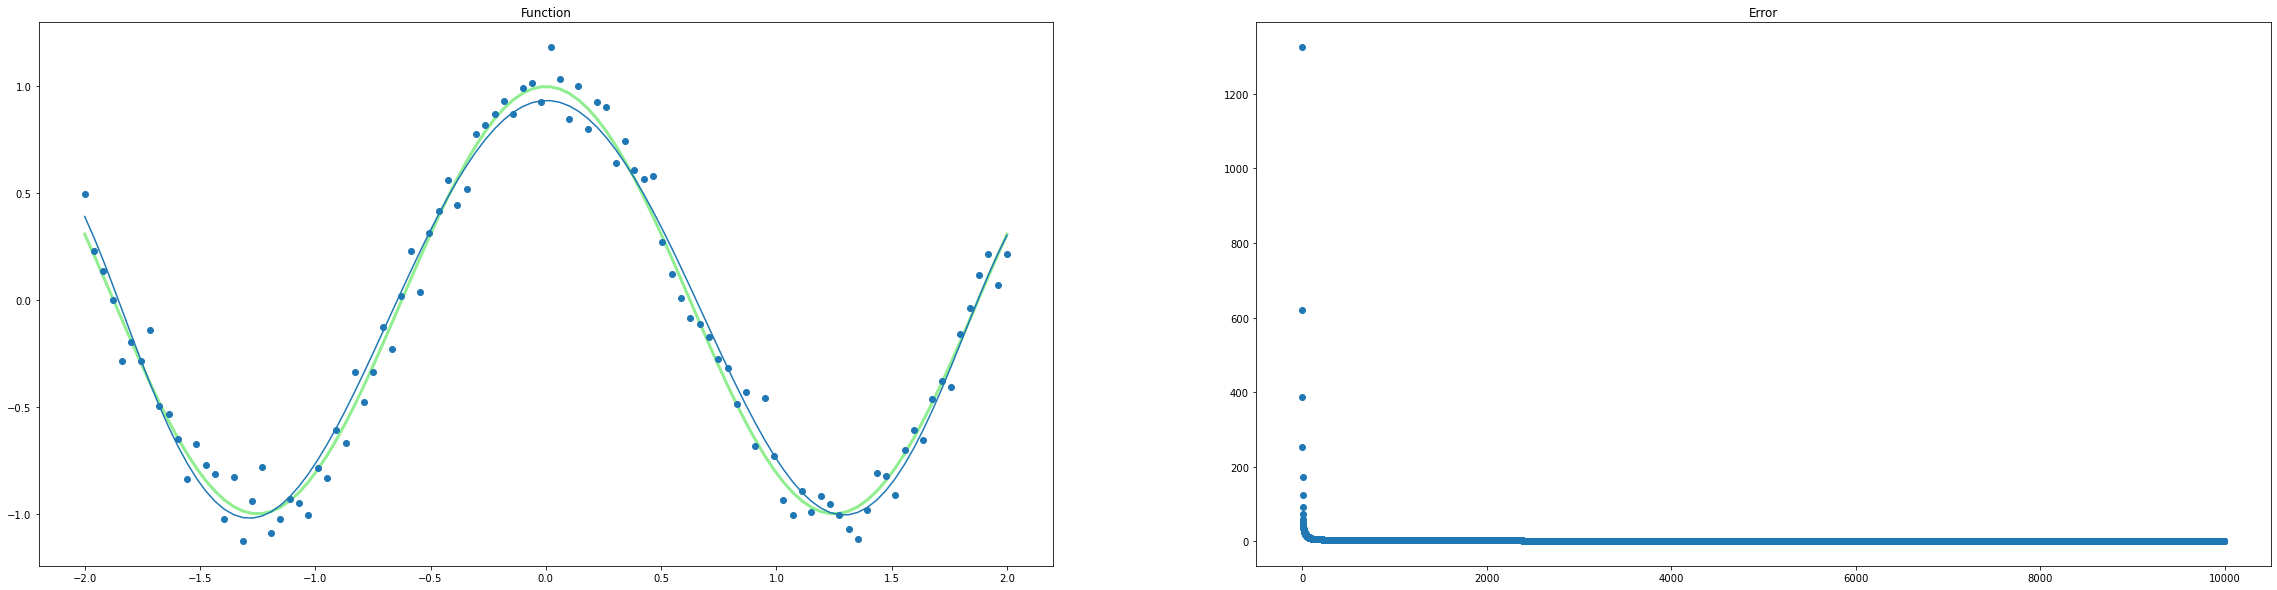

In [39]:
# initialize variables
data = create_data()
x = data["x"]
y = data["y"]
w = np.random.normal(size=(np.shape(x)[1], 1))
eta = 0.1
iterations = 10000
batch = 10


def stochastic_gradient_descent(x, y, w, eta):
    derivative = -(y - np.dot(w.T, x)) * x.reshape(np.shape(w))
    return eta * derivative


def batch_gradient_descent(x, y, w, eta):
    derivative = np.sum(
        [
            -(y[d] - np.dot(w.T.copy(), x[d, :])) * x[d, :].reshape(np.shape(w))
            for d in range(len(x))
        ],
        axis=0,
    )
    return eta * (1 / len(x)) * derivative


def mini_batch_gradient_descent(x, y, w, eta, batch):
    gradient_sum = np.zeros(shape=np.shape(w))
    for b in range(batch):
        choice = np.random.choice(list(range(len(x))))
        gradient_sum += -(y[choice] - np.dot(w.T, x[choice, :])) * x[choice, :].reshape(
            np.shape(w)
        )
        return eta * (1 / batch) * gradient_sum


# Update w
w_s = []
Error = []
for i in range(iterations):
    # Calculate error
    error = (1 / 2) * np.sum(
        [(y[i] - np.dot(w.T, x[i, :])) ** 2 for i in range(len(x))]
    )
    Error.append(error)
    # Stochastic Gradient Descent
    """
    for d in range(len(x)):
        w-= stochastic_gradient_descent(x[d,:],y[d],w,eta)
        w_s.append(w.copy())
    """
    # Minibatch Gradient Descent
    """
    w-= mini_batch_gradient_descent(x,y,w,eta,batch)
    """

    # Batch Gradient Descent

    w -= batch_gradient_descent(x, y, w, eta)


# Show predicted weights
print(w_s)

# Plot the predicted function and the Error
plot_function(x, y, w, Error, w_s)